# Wine quality predidction

## Importing required packages

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# importing essential tools from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

## Loading dataset

In [142]:
wine = pd.read_csv('winequality-red.csv')

In [143]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [144]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**>Checking null value in every column**

## DATA PREPROCESSING

In [145]:
wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [146]:
wine['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


### Binning as a data preprocessing technique to categorize continuous data into discrete intervals.(continue to two category)

- `bins=(2,6.5,8):`
This defines the boundaries for the bins. It means the data will be split into two intervals:
From 2 to 6.5 (inclusive of 2, exclusive of 6.5).
From 6.5 to 8 (inclusive of 6.5, exclusive of 8).

- `group_names=['bad','good']:`
These are the labels assigned to each bin. For example:

   Data that falls in the interval [2, 6.5) will be labeled as 'bad'.
Data that falls in [6.5, 8) will be labeled as 'good'.

- `pd.cut(wine['quality'], bins=bins, labels=group_names):`

   The` pd.cut()` function from the pandas library divides the wine['quality'] column into the specified bins.
It replaces the numeric values in the column with the corresponding labels ('bad' or 'good'), depending on which bin the value falls into.

- `wine['quality']:`
This overwrites the original quality column in the wine DataFrame with the newly categorized values ('bad' or 'good').

In [147]:
bins=(2,6.5,8) # defining interval for 'bad' and 'Good'
group_names=['bad','good'] # Grouping in two category

wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names) # spliting bad and good wine using cut.

wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [148]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


## Label encoder
- `LabelEncoder` is a utility in Python's scikit-learn library used to convert categorical labels into numerical values.

In [149]:
# Initialize the encoder
label_quality = LabelEncoder()

# Fit and transform the data
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [150]:
wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [151]:
wine['quality'].value_counts()

,count
quality,
0,1382
1,217


### Imbalanced dataset

<ipython-input-152-01dead9d5182>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine, palette='hls')


<Axes: xlabel='quality', ylabel='count'>

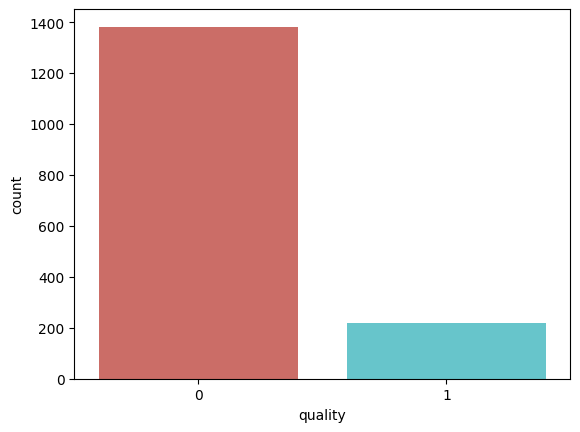

In [152]:
sns.countplot(x='quality', data=wine, palette='hls')

In [153]:
X = wine.drop(['quality'], axis=1)
y = wine[['quality']]

### SMOTE FOR BALACING DATASET

In [154]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X,y = oversample.fit_resample(X, y)
wine = pd.concat([X, y], axis=1)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,0
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,0
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,0
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2759,12.027041,0.302863,0.628350,2.313719,0.089274,9.000000,28.000000,0.998633,3.211451,0.787177,10.914512,1
2760,8.863844,0.342150,0.452150,2.274594,0.053085,13.000000,27.000000,0.994617,3.254919,0.787916,12.640720,1
2761,10.847931,0.395207,0.662810,5.150215,0.076613,36.880172,72.640516,0.999448,3.225991,0.876129,11.552069,1
2762,9.793183,0.302828,0.470000,1.550253,0.058146,8.356057,24.000000,0.997132,3.204975,0.837172,10.450253,1


In [155]:
wine['quality'].value_counts()

,count
quality,
0,1382
1,1382


### Balanced dataset

<ipython-input-156-01dead9d5182>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine, palette='hls')


<Axes: xlabel='quality', ylabel='count'>

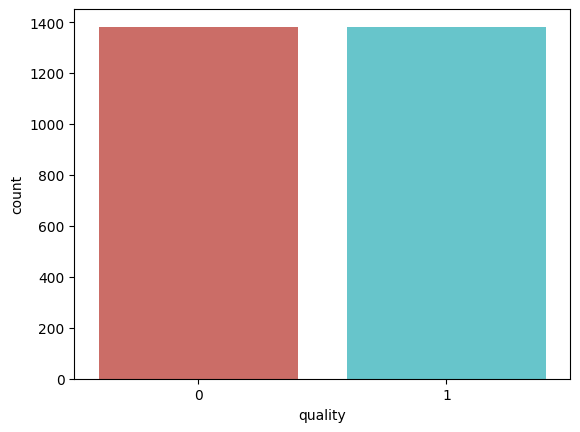

In [156]:
sns.countplot(x='quality', data=wine, palette='hls')

## Separate dataset as independent and dependent(target) variable

---


1.    independent Variables (X):

    -  These are the `input variables` used to predict the response variable.
     - Also `called predictors, independent variables`, or explanatory variables.
     - Examples: Age, income, number of hours studied, etc.
---

2.   dependent(target) (y):

     - This is the `output variable` you are trying to predict.
     - Also called the `dependent variable or target variable`.
     - Examples: Exam score, house price, disease diagnosis, et  



In [157]:
X = wine.drop('quality',axis=1) # quality is our target variables so we subtract this from data and making all other data into feature varibale.

y = wine['quality'] # We placed it as target variable

In [158]:
type(X) # Independent feature should be in DataFramme or 2d array

pandas.core.frame.DataFrame

In [159]:
type(y) # Target Feature can be in series or 1d array no problem

pandas.core.series.Series

# Splitting Data into Train & Test

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [187]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1934, 11), (830, 11), (1934,), (830,))

### storing for saving dataset as train and test

In [162]:
test= pd.concat([X_test, y_test], axis=1)
test.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1988,11.802579,0.671294,0.536495,3.361032,0.125142,6.870106,21.064947,0.999239,3.175845,0.833505,12.135053,1
1216,7.900000,0.570000,0.310000,2.000000,0.079000,10.000000,79.000000,0.996770,3.290000,0.690000,9.500000,0
1385,8.000000,0.810000,0.250000,3.400000,0.076000,34.000000,85.000000,0.996680,3.190000,0.420000,9.200000,0
2562,12.743607,0.302820,0.734361,2.487213,0.088515,8.154098,28.281967,0.999203,3.109770,0.784098,10.518033,1
1334,7.200000,0.835000,0.000000,2.000000,0.166000,4.000000,11.000000,0.996080,3.390000,0.520000,10.000000,0


In [163]:
test.shape

(830, 12)

In [164]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1765,7.955579,0.404442,0.226153,4.391818,0.075903,10.00000,18.503719,0.995752,3.334740,0.705186,11.602975,1
2103,9.307489,0.310088,0.520749,2.214978,0.073075,6.30837,17.383260,0.995713,3.203084,0.994317,12.154185,1
192,6.800000,0.630000,0.120000,3.800000,0.099000,16.00000,126.000000,0.996900,3.280000,0.610000,9.500000,0
801,8.600000,0.550000,0.090000,3.300000,0.068000,8.00000,17.000000,0.997350,3.230000,0.440000,10.000000,0
174,7.300000,0.380000,0.210000,2.000000,0.080000,7.00000,35.000000,0.996100,3.330000,0.470000,9.500000,0


In [165]:
train.shape

(1934, 12)

In [166]:
test_set= test.to_csv('test and train/ test_set.csv', index=False)

In [167]:
train_set= train.to_csv('test and train/ train_set.csv', index=False)

# Using this with confusion matrix we can understand how much close our model are predicting to actual values

In [168]:
y_test_df.value_counts()

,count
quality,
0,435
1,395


# ScaleEncoder
- The StandardScaler is a feature-scaling technique provided by scikit-learn to standardize numerical data.

- Imagine you’re comparing heights (in centimeters) and weights (in kilograms). Since weights have smaller numbers, they might seem less important to the model. StandardScaler makes the numbers of both features comparable so the model treats them equally.

In [171]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [172]:
X_train,X_test

(array([[-3.36046715e-01, -4.05044060e-01, -4.74358654e-01, ...,
          2.40973957e-01,  2.42690139e-02,  6.23445477e-01],
        [ 4.28330165e-01, -9.63574741e-01,  1.05040044e+00, ...,
         -6.62536945e-01,  1.85061610e+00,  1.11260611e+00],
        [-9.89416616e-01,  9.30149953e-01, -1.02378102e+00, ...,
         -1.34686063e-01, -5.76989163e-01, -1.24280052e+00],
        ...,
        [ 3.11014812e-01,  7.52564389e-01, -1.64487261e+00, ...,
         -8.20952648e-01, -4.50655781e-01, -4.44112383e-01],
        [-1.97849660e-01,  9.59747547e-01, -1.12729629e+00, ...,
         -6.60594049e-02,  3.07344510e-01, -3.96753336e-04],
        [-7.63254629e-01,  8.70954765e-01, -1.33432682e+00, ...,
          1.44372708e+00, -1.01915600e+00, -1.24280052e+00]]),
 array([[ 1.83906652,  1.17459218,  1.13189704, ..., -0.84946533,
          0.83481973,  1.09562771],
        [-0.36747115,  0.57497883, -0.04038601, ..., -0.0660594 ,
         -0.07165564, -1.24280052],
        [-0.31093065,  1.

# RandomForestClassifier


**Random Forest Classifier:**
- The Random Forest Classifier is a powerful and versatile machine learning algorithm that is based on an ensemble of decision trees. It combines the predictions of multiple decision trees to improve the accuracy, reduce overfitting, and handle complex datasets effectively.



In [173]:
# Initialize RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
rfc.fit(X_train, y_train)

# Make predictions on the test data
pred_y = rfc.predict(X_test)

*Performance Evaluation*

In [174]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       435
           1       0.90      0.98      0.93       395

    accuracy                           0.93       830
   macro avg       0.94      0.94      0.93       830
weighted avg       0.94      0.93      0.93       830



In [175]:
cf_matrix = confusion_matrix(y_test, pred_y) # (row , column)
print(cf_matrix)

[[390  45]
 [  9 386]]


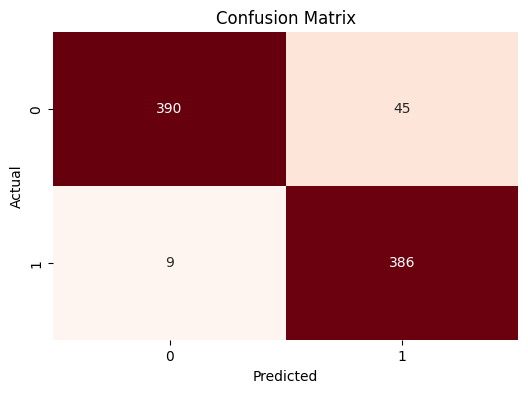

In [176]:
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# SVM CLASSIFIER

In [177]:
svm_cf = svm.SVC()
svm_cf.fit(X_train, y_train)
Pred_clf = svm_cf.predict(X_test)

In [178]:
print (classification_report(y_test, Pred_clf))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       435
           1       0.85      0.95      0.90       395

    accuracy                           0.90       830
   macro avg       0.90      0.90      0.90       830
weighted avg       0.90      0.90      0.90       830



In [179]:
svm_cm= confusion_matrix(y_test, Pred_clf)
print(svm_cm)

[[369  66]
 [ 18 377]]


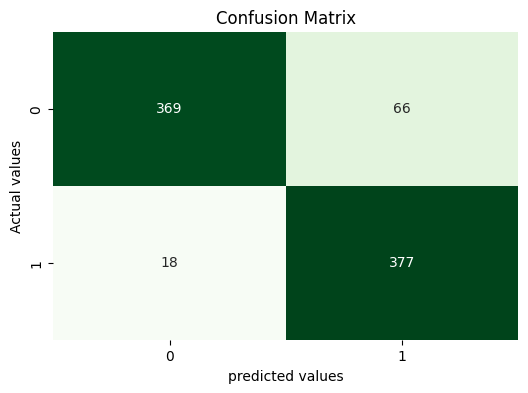

In [180]:
plt.figure(figsize=(6,4))

sns.heatmap(svm_cm, annot= True, fmt='d', cmap= 'Greens',cbar= False)
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()

# NEURAL NETWORK

In [181]:
# Multilayer perception classifier

mlp = MLPClassifier(hidden_layer_sizes=(100), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
pred_mlp = mlp.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [182]:
mlp_cf = confusion_matrix(y_test, pred_mlp)
mlp_cf

array([[379,  56],
       [ 11, 384]])

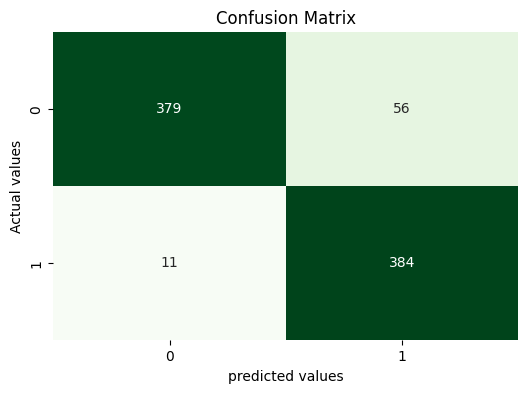

In [183]:
plt.figure(figsize=(6,4))

sns.heatmap(mlp_cf, annot= True, fmt='d', cmap= 'Greens',cbar= False)
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()

In [184]:
print(classification_report(y_test, pred_mlp))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       435
           1       0.87      0.97      0.92       395

    accuracy                           0.92       830
   macro avg       0.92      0.92      0.92       830
weighted avg       0.92      0.92      0.92       830



accuracy of mlp

In [185]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_mlp)
print(cm)

0.9192771084337349


# Checking our models in new data point

In [186]:
Xnew =[8.5,	0.280	,0.56,	1.8,	0.092,	35.0,	103.0,	0.9969,	3.30,	0.75,	10.5] # values are taken from label encoded data's row 16

Xnew = scale.fit_transform([Xnew]) # scaling data
PRED_rfc= rfc.predict(Xnew) #using random forest
pred_mlp = mlp.predict(Xnew) #using neural network
pred_svm = svm_cf.predict(Xnew) #using svm

print(PRED_rfc)
print(pred_mlp)
print(pred_svm)

[1]
[1]
[1]
